<style type="text/css">

# <p style="text-align:center">PREDICTING HIT SONGS
#### <p style="text-align:center">By: David Wiley
#### <p style="text-align:center">Advisor: Dr. Vasilis Zafiris

___

___
## <p style="text-align:center"> <u>ABSTRACT</u>
___

___
## <p style="text-align:center"> <u>INTRODUCTION</u>
___

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to the IFPI's (International Federation of the Phonographic Industry) [Global Music Report 2019](https://www.ifpi.org/news/IFPI-GLOBAL-MUSIC-REPORT-2019), the total revenue for 2018 was US$19.1 billion. The report also states the global recorded music market grew by 9.7\% since 2017.
With an increase in recorded music and the potential revenue it generates it is evident that being able to predict whether or not a song will be a hit could prove to be an extremely lucrative practice.The purpose of this project is to explore this practice using data analysis and machine learning methods. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

___
## <p style="text-align:center"> <u>DATA</u>
---

The Billboard has tracked the top 100 songs every week since 1955 and has since become the industry standard record chart in the United States. This will also be used as the standard to determine which songs are popular. 

##### Importing necessary libraries:

In [1]:
import numpy as np, pandas as pd

##### Reading in data from csv:

In [2]:
# Reading in the data from a csv then immediately putting it into a dataframe
#songs = pd.DataFrame(pd.read_csv("all_song_data.csv"))

songs = pd.read_csv("all_song_data.csv")

##### What the data looks like:

In [3]:
# Looking at the first few songs
songs.head()

,spotify_id,year,title,artist,peak_pos,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
0,000xQL6tZNLJzIrtIgxqSl,2017,Still Got Time,zayn,66,1,0.627,0.0852,120.963,0.0644,0.13100,0.000000,4,0.748,7,188491,-6.029,0.524,1
1,0010mZpCCwlPwoBiBsjoac,2014,It's Alright Now,Bombay Bicycle Club,0,0,0.793,0.1440,124.994,0.0352,0.10800,0.000003,3,0.527,3,249947,-4.823,0.597,1
2,002opcRBgYV5jqoh72QcqA,2016,Just to See You Smile,Why Don't We,0,0,0.618,0.1020,89.901,0.1420,0.05080,0.000000,4,0.707,9,181958,-7.154,0.261,1
3,003VWU5LKbDkXTqpLQuID1,2013,The Outsiders,eric church,51,1,0.808,0.1010,80.026,0.0633,0.28200,0.000050,4,0.521,7,253640,-5.204,0.323,1
4,005lwxGU1tms6HGELIcUv9,2008,I Kissed A Girl,katy perry,1,1,0.760,0.1320,129.996,0.0677,0.00223,0.000000,4,0.699,5,179640,-3.173,0.696,1


---
### <p style="text-align:center">Description of Characteristics

|  <p style="text-align:center">Key | <p style="text-align:center">Value Type | <p style="text-align:center">Description |
|-----|------------|-------------|
| <p style="text-align:center"> **energy** | <p style="text-align:center">*float* | <p style="text-align:justify">Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| <p style="text-align:center">**liveness** | <p style="text-align:center">*float* | <p style="text-align:justify">Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| <p style="text-align:center">**tempo** | <p style="text-align:center">*float* | <p style="text-align:justify">The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| <p style="text-align:center">**speechiness** | <p style="text-align:center">*float* | <p style="text-align:justify">Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| <p style="text-align:center">**acousticness** | <p style="text-align:center">*float* | <p style="text-align:justify">A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| <p style="text-align:center">**instrumentalness** | <p style="text-align:center">*float* | <p style="text-align:justify">Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| <p style="text-align:center">**time_signature** | <p style="text-align:center">*int* | <p style="text-align:justify">An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |
| <p style="text-align:center">**danceability** | <p style="text-align:center">*float* | <p style="text-align:justify">Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| <p style="text-align:center">**key** | <p style="text-align:center">*int* | <p style="text-align:justify">The estimated overall key of the track. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class) . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
| <p style="text-align:center">**duration_ms** | <p style="text-align:center">*int* | <p style="text-align:justify">The duration of the track in milliseconds. |
| <p style="text-align:center">**loudness** | <p style="text-align:center">*float* | <p style="text-align:justify">The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| <p style="text-align:center">**valence** | <p style="text-align:center">*float* | <p style="text-align:justify">A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| <p style="text-align:center">**mode**| <p style="text-align:center">*int* | <p style="text-align:justify">Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |

*<p style="text-align:right">[source](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)*

___
### <p style="text-align:center"> Visualizing the data to gain insight

In [4]:
# matplotlib lets us create the histogram plots to visualize the data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# creating an array of the headers in the data to cycle through a for loop to plot each histogram
characteristics = ['energy', 
                   'liveness', 
                   'tempo', 
                   'speechiness', 
                   'acousticness', 
                   'instrumentalness', 
                   'time_signature', 
                   'danceability', 
                   'key', 
                   'duration_ms', 
                   'loudness', 
                   'valence', 
                   'mode']


# creating a dataframe specifically for the billboard hits to be compared visually in the histograms
popular_songs = songs.loc[songs['popularity']==1]

unpopular_songs = songs.loc[songs['popularity']==0]

# creating an empty plot grid
grid = plt.figure()
# the count variable will be used to add each histogram to the grid
count = 1

# a for loop to create each histogram
for name in characteristics:
    
    # Capitalizing the headers in the name array to be used as titles
    title = name.capitalize()
    
    # adding the histogram for the iteration to the plot grid
    # there are two histograms being generated (one with all data, one with just hit songs)
    # they are layered ("stacked") for comparison
    grid.add_subplot(7,2,count)
    plt.hist(songs[name], color='blue', label='All Songs', alpha=0.7)
    plt.hist(popular_songs[name], color='red', label='Popular Songs', alpha=0.7)
    plt.hist(unpopular_songs[name], color='navy', label='Unpopular Songs', histtype='step')
    plt.legend(prop={'size': 10})
    
    # applying title and axis names to the histogram
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    # adding 1 to the count to position the next histogram plot
    count+=1

# configuring the size of plot grid
grid.set_figheight(50)
grid.set_figwidth(15)

# showing plot grid
plt.show()

<Figure size 1500x5000 with 13 Axes>

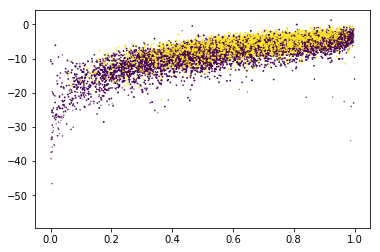

In [5]:
plt.scatter(songs['energy'], songs['loudness'], songs['danceability'], c=songs['popularity'])
plt.show()

<IPython.core.display.Javascript object>


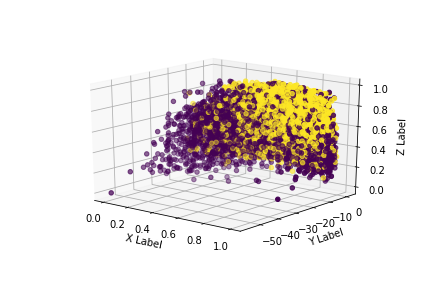

In [8]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(songs['energy'], songs['loudness'], songs['danceability'], c=songs['popularity'], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

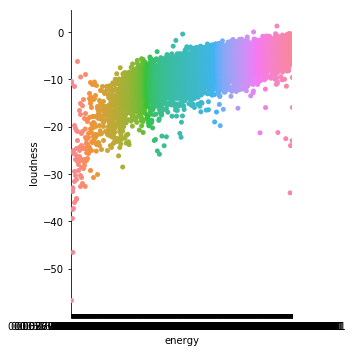

In [9]:
#plt.scatter(songs['energy'], songs['loudness'], c=songs['popularity'])
#sns.catplot(x=energy_array, y=popularity_array)
%matplotlib inline

import seaborn as sns

sns.catplot(x='energy', y='loudness', data=songs)
plt.show()

In [10]:
attributes = ['popularity', 
              'energy', 
              'liveness', 
              'tempo', 
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'time_signature', 
              'danceability', 
              'key', 
              'duration_ms', 
              'loudness', 
              'valence', 
              'mode']

corr_matrix = songs[attributes].corr()

In [11]:
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
loudness            0.299264
danceability        0.253639
energy              0.165695
time_signature      0.105563
speechiness         0.092811
valence             0.090136
tempo               0.030475
key                 0.015335
mode               -0.029732
duration_ms        -0.040850
liveness           -0.065040
instrumentalness   -0.224926
acousticness       -0.242218
Name: popularity, dtype: float64

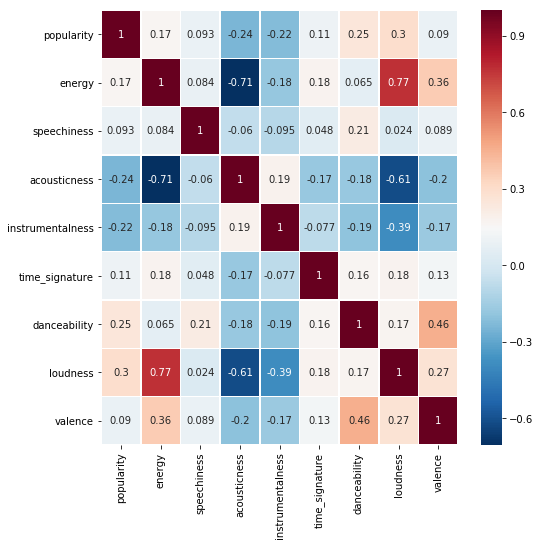

In [12]:


main_att = ['popularity', 
              'energy',   
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'time_signature', 
              'danceability',  
              'loudness', 
              'valence']

plt.figure(figsize=(8, 8))
sns.heatmap(songs[main_att].corr(), annot=True, linewidths = .5, cmap='RdBu_r')

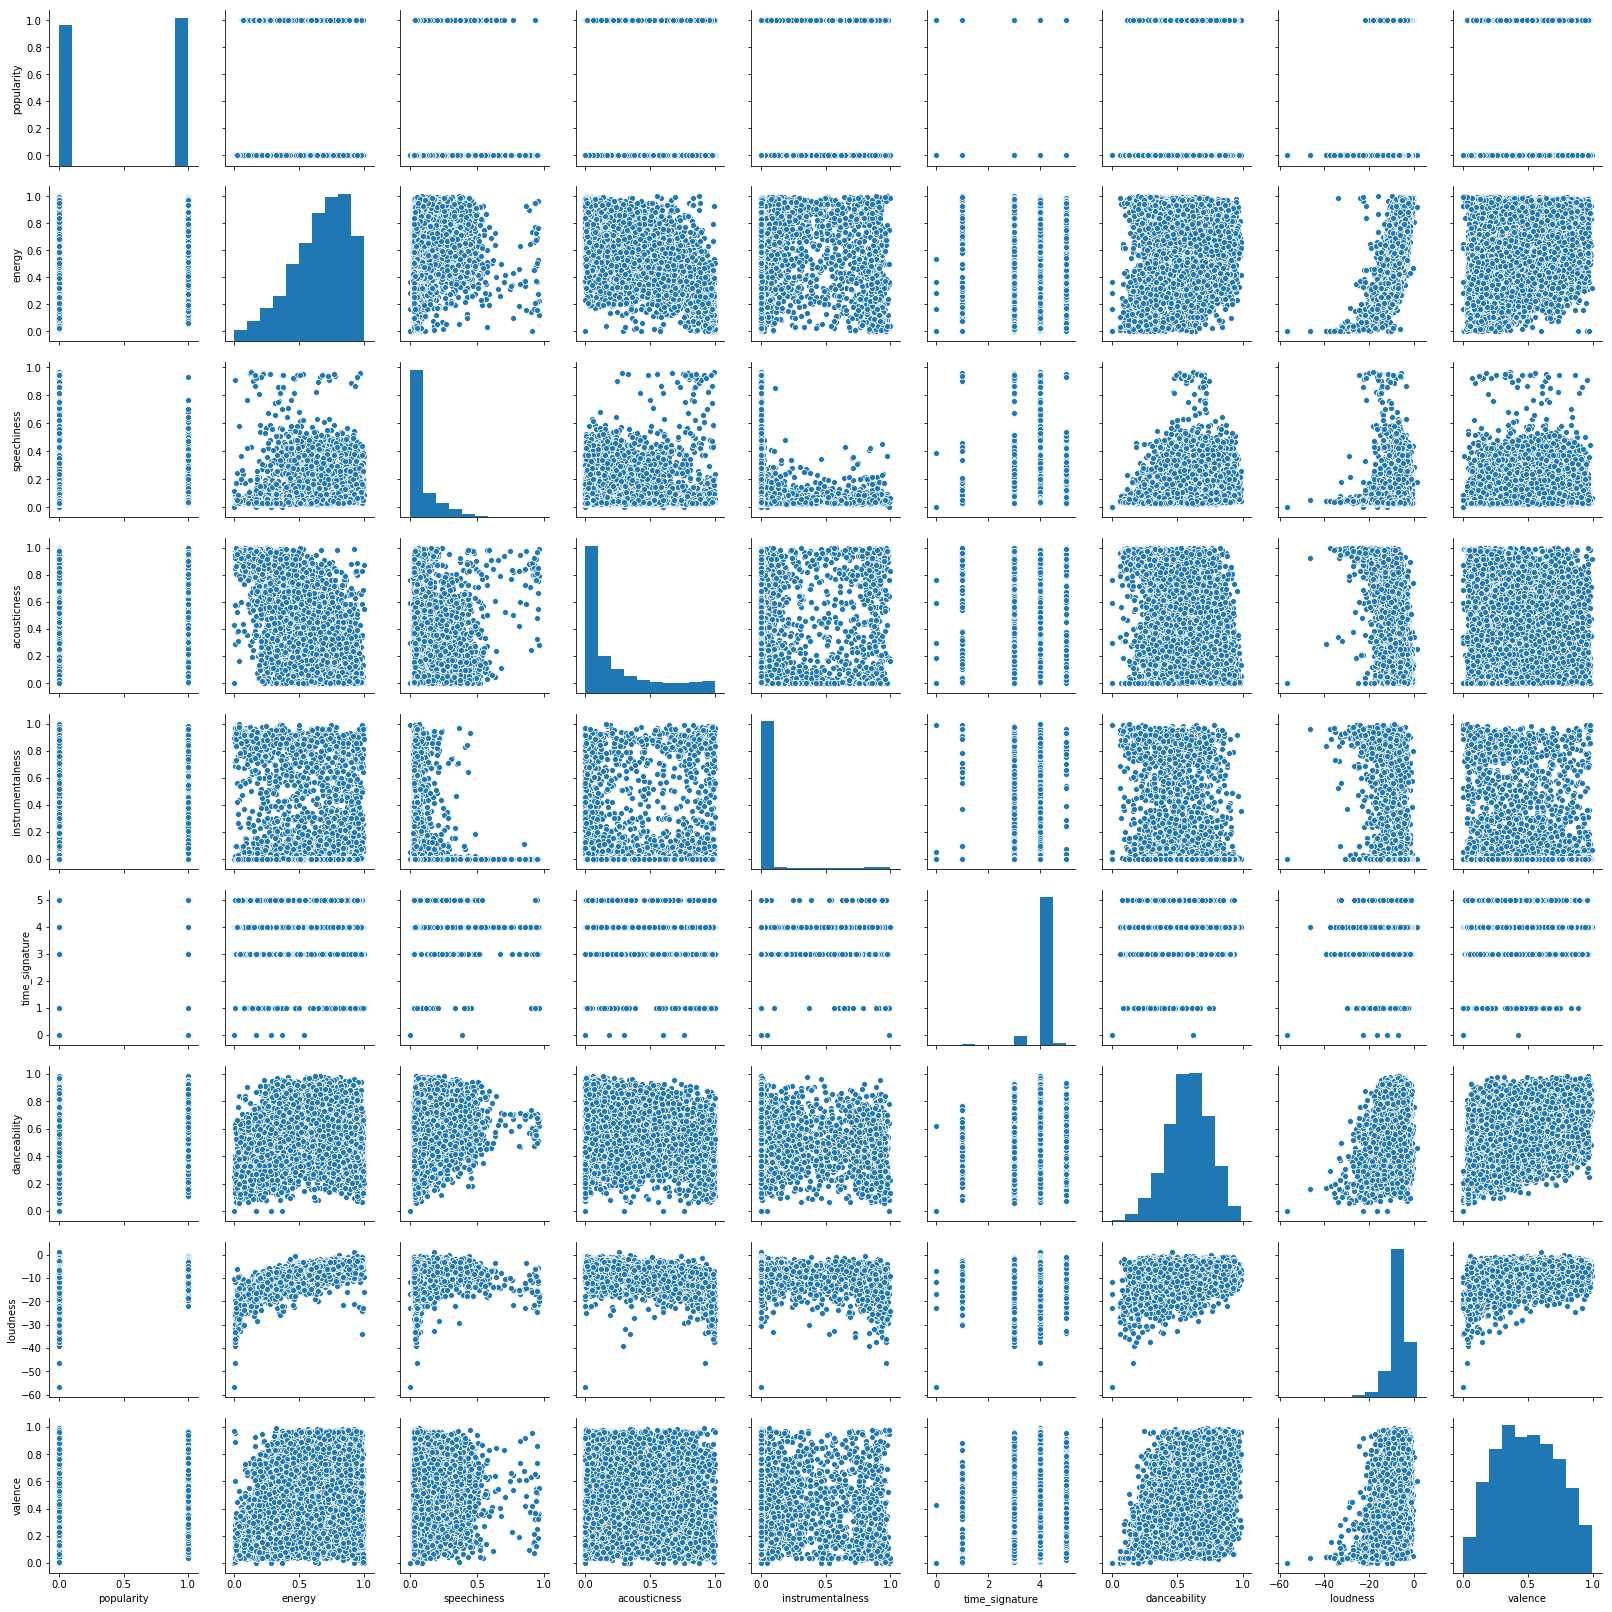

<Figure size 576x576 with 0 Axes>

In [13]:
from pandas.plotting import scatter_matrix

songs_df = pd.DataFrame(songs, columns=main_att)
#pd.plotting.scatter_matrix(songs_df, alpha=0.2, figsize=(20, 20))
#plt.show()

sns.pairplot(songs_df)
plt.figure(figsize=(8, 8))
plt.show()

___
## <p style="text-align:center"> <u>METHODS</u>
___

##### Splitting the data into a training and testing set

In [28]:
from sklearn.model_selection import train_test_split

# import libraries to test accuracy
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, log_loss

# next few lines are to clean up warnings in calling the models
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
x = songs.drop(["spotify_id", 
                "year", 
                "title", 
                "artist", 
                "peak_pos", 
                "popularity", 
                "speechiness", 
                "valence", 
                "tempo", 
                "key", 
                "mode", 
                "duration_ms", 
                "liveness"], axis=1).values
y = songs["popularity"].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41, stratify=y)

### <p style="text-align:center">Logistic Regression

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(x_train, y_train)
print(lasso.coef_)

[ 0. -0. -0.  0.  0.  0.]


In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train, y_train)

/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
log_reg_labels = log_reg.predict(x_test)
log_reg_labels

array([0, 1, 1, ..., 0, 0, 0])

In [21]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [22]:
log_reg.score(x_test, y_test)

0.6903460837887068

In [23]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, log_reg_labels)))
print("R2: ", r2_score(y_test, log_reg_labels))

RMSE:  0.5564655570754521
R2:  -0.23939877805080934


In [29]:
accuracy_score(y_test, log_reg_labels)

0.6903460837887068

### <p style="text-align:center">Stochastic Gradient Descent Classifier

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10000, loss='log')
sgd_clf.fit(x_train, y_train)

/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgdc_labels = sgd_clf.predict(x_test)
sgdc_labels

array([0, 1, 1, ..., 0, 0, 0])

In [26]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [27]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, sgdc_labels)))
print("R2: ", r2_score(y_test, sgdc_labels))

RMSE:  0.5558105061631926
R2:  -0.23648254563186621


In [30]:
accuracy_score(y_test, sgdc_labels)

0.6910746812386157

### <p style="text-align:center">Stochastic Gradient Descent Regression

##### Not a classifier but may use this against the "peak_pos" column rather than populari

In [32]:
from sklearn.linear_model import SGDRegressor

sgd_r = SGDRegressor(random_state=41, max_iter=10000)
sgd_r.fit(x_train, y_train)

/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=41, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [33]:
sgdr_labels = sgd_r.predict(x_test)
sgdr_labels

array([0.44041728, 0.48188425, 0.62910366, ..., 0.03823811, 0.51124132,
       0.373853  ])

In [34]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [35]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, sgdr_labels)))
print("R2: ", r2_score(y_test, sgdr_labels))

RMSE:  0.46150749183208645
R2:  0.14750469139817646


### <p style="text-align:center">k-Nearest Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [41]:
knn_labels = knn.predict(x_test)
knn_labels

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [43]:
knn.score(x_test, y_test)

0.6841530054644809

In [44]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, knn_labels)))
print("R2: ", r2_score(y_test, knn_labels))

RMSE:  0.5620026641711934
R2:  -0.26418675361182564


In [45]:
accuracy_score(y_test, knn_labels)

0.6841530054644809

### <p style="text-align:center"> Random Forrest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rfc_labels = rfc.predict(x_test)
rfc_labels

array([1, 0, 0, ..., 0, 0, 0])

In [48]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [49]:
rfc.score(x_test, y_test)

0.6790528233151184

In [50]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, rfc_labels)))
print("R2: ", r2_score(y_test, rfc_labels))

RMSE:  0.5665220001772937
R2:  -0.28460038054442705


In [51]:
accuracy_score(y_test, rfc_labels)

0.6790528233151184

### <p style="text-align:center"> Discriminant Analysis

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [53]:
lda_labels = lda.predict(x_test)
lda_labels

array([0, 0, 1, ..., 0, 1, 0])

In [54]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [55]:
lda.score(x_test, y_test)

0.6903460837887068

In [56]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lda_labels)))
print("R2: ", r2_score(y_test, lda_labels))

RMSE:  0.5564655570754521
R2:  -0.23939877805080934


In [57]:
accuracy_score(y_test, lda_labels)

0.6903460837887068

### <p style="text-align:center"> Simple Vector Machine

In [58]:
from sklearn import svm

s_v_m = svm.SVC()
s_v_m.fit(x_train, y_train)

/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
s_v_m_labels = s_v_m.predict(x_test)
s_v_m_labels

array([1, 1, 1, ..., 0, 1, 0])

In [60]:
y_test

array([0, 1, 0, ..., 0, 1, 1])

In [61]:
s_v_m.score(x_test, y_test)

0.6797814207650273

In [62]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, s_v_m_labels)))
print("R2: ", r2_score(y_test, s_v_m_labels))

RMSE:  0.5658785905430357
R2:  -0.28168414812548415


In [63]:
accuracy_score(y_test, s_v_m_labels)

0.6797814207650273

### <p style="text-align:center">Classification Showdown

In [64]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 63.3151%
Log Loss: 4.248661334096427


/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 64.6995%
Log Loss: 0.6259581737318838


/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC
****Results****
Accuracy: 56.9399%
Log Loss: 0.6682781905474589
DecisionTreeClassifier
****Results****
Accuracy: 60.6193%
Log Loss: 13.589531803593681


/usr/local/src/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 68.4882%
Log Loss: 1.3262602305873024
AdaBoostClassifier
****Results****
Accuracy: 70.7832%
Log Loss: 0.6848317932628435
GradientBoostingClassifier
****Results****
Accuracy: 71.9490%
Log Loss: 0.5631260840897993
GaussianNB
****Results****
Accuracy: 64.4080%
Log Loss: 1.2738302932361643
LinearDiscriminantAnalysis
****Results****
Accuracy: 69.0346%
Log Loss: 0.6006280397814175
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 64.6266%
Log Loss: 1.0748654636451271


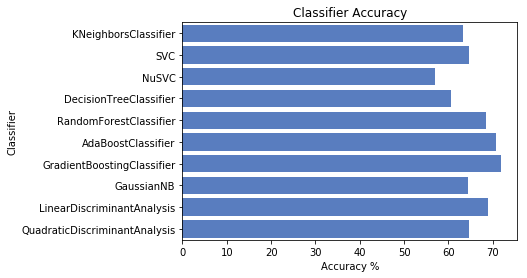

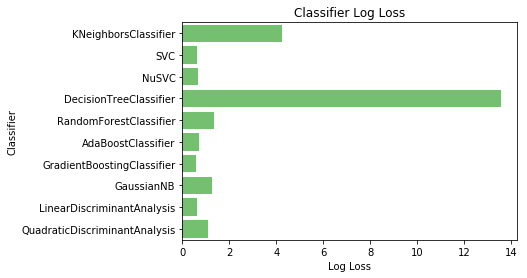

In [65]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

#https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

___
## <p style="text-align:center"> <u>RESULTS</u>
___

___
## <p style="text-align:center"> <u>DISCUSSION</u>
___

___
## <p style="text-align:center"> <u>CONCLUSION</u>
___

___
## <p style="text-align:center"> <u>REFERENCES</u>
___

https://data.world/typhon/billboard-hot-100-songs-2000-2018-w-spotify-data-lyrics
https://www.kaggle.com/mousehead/songlyrics
https://spotipy.readthedocs.io/en/latest/
